### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Kezdőértékek inicializálása

In [2]:
X = np.array(np.linspace(0, 10, 100))
B0 = 0
B1 = 0

In [3]:
y = []

for i in range(len(X)):
    if (X[i] < 5):
        y.append(0)
    else:
        y.append(1)

In [4]:
def y_kalap(x, b0, b1):
    y_k = []
    for i in range(len(x)):
        y_k.append(1/(1 + np.exp((-1)*(b0 + b1*x[i]))))
        
    return y_k
        
y_ = y_kalap(X, B0, B1)

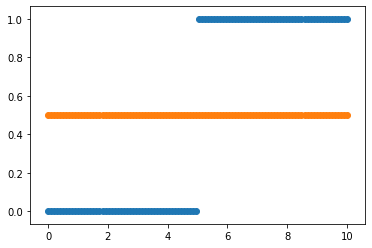

In [5]:
plt.scatter(X, y)
plt.scatter(X, y_)

In [6]:
def hiba(y, y_):
    return np.sum((np.array(y_) - np.array(y))**2)

hiba(y, y_)

25.0

In [7]:
np.array(1-np.array(y))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
np.sum(-np.array(y)*np.log(np.array(y_)) - (1-np.array(y))*np.log(1-np.array(y_)))

69.31471805599453

### Rosszul besoroltak száma

In [9]:
def y_pred(y, y_):
    y_pred = []

    for i in range(len(y_)):
        if y_[i] >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return y_pred

np.sum(np.array(y_pred(y, y_)) - np.array(y))

50

### Gradient descent

In [10]:
for i in range(10000):
    dB0 = np.sum(np.array(y_) - np.array(y))
    dB1 = np.sum((np.array(y_) - np.array(y))*np.array(X))

    B0 = B0 - dB0*0.001
    B1 = B1 - dB1*0.001
    
    y_ = y_kalap(X, B0, B1)

In [11]:
print('B0: ', B0)
print('B1: ', B1)

B0:  -13.052375990389027
B1:  2.634646124622796


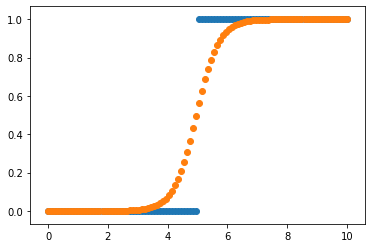

In [12]:
plt.scatter(X, y)
plt.scatter(X, y_)

In [13]:
hiba(y, y_)

1.459730271327025

In [14]:
np.sum(-np.array(y)*np.log(np.array(y_)) - (1-np.array(y))*np.log(1-np.array(y_)))

6.197378258608166

In [15]:
print('Rosszul besoroltak száma: ', np.sum(np.array(y_pred(y, y_)) - np.array(y)))

Rosszul besoroltak száma:  0
